# W2V
- 기존 통계 기법의 단점을 커버하는 추론기법
- 맥락 정보를 입력받아 각 단어의 출현 확률을 구함
- 학습 결과로 얻어진 `가중치`를 `단어의 분산 표현`으로 이용

![process](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/process.png?raw=1)

|특징| 통계 기법| 추론기법 |
|:--------|:--------|:--------|
|학습| 말뭉치 전체 통계로 1회 학습 | 말뭉치의 일부를 여러번 학습 |
|새로운 단어 추가| 처음부터 다시 계산 | 추가 학습 가능 |
|정밀도| 단어의 유사성 |유사성 + 단어 사이의 패턴|

## CBOW vs Skip-gram
- 주변 맥락을 통해 단어를 예측 vs 단어를 통해 주변 맥락을 예측
- Skip-gram이 학습에 더 오랜 시간이 걸리지만 성능이 더 좋음

![cbow_vs_skipgram](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/cbow_vs_skipgram.png?raw=1)

### CBOW
![cbow](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/cbow.png?raw=1)


### Skip-gram
![cbow](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/skipgram.png?raw=1)

### W2V의 결과?
- 맥락을 통해 나올 단어를 예측
- $W_{in}$, $W_{out}$ 두 종류의 Weight 존재
- $W_{in}$는 각 행이 각 단어의 분산 표현
- $W_{out}$는 각 열이 각 단어의 분산 표현
- 보통 $W_{in}$이 단어의 분산 표현을 잘 나타냄

![weight](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/weight.png?raw=1)


## 구현
- 순전파, 역전파를 위해 정형화된 클래스를 이용

### 입력층 - 은닉층
- 단어를 적절한 고정된 입력으로 변환해야 학습이 가능
- One-hot vector 사용
- 은닉층의 차원이 전체 단어의 차원보다 작아야 차원을 감소하며 단어의 분산을 얻음

![input1](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/input1.png?raw=1)

![inpit3](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/input3.png?raw=1)

![inpit4](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/input4.png?raw=1)

In [0]:
#!pip install numpy

In [0]:
#!pip install matplotlib

In [0]:
!git clone https://github.com/psynlp/Training-and-Techniques

Cloning into 'Training-and-Techniques'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 121 (delta 20), reused 101 (delta 13), pack-reused 0
Receiving objects: 100% (121/121), 5.54 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [0]:
!git pull

remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 6), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (8/8), done.
From https://github.com/psynlp/Training-and-Techniques
   a41128d..57b8217  master     -> origin/master
Updating a41128d..57b8217
Fast-forward
 0801/Untitled.ipynb  | 20 +++++++++-----------
 0801/train_data2.txt |  2 +-
 2 files changed, 10 insertions(+), 12 deletions(-)


In [0]:
import os

os.chdir("Training-and-Techniques/0801")

In [0]:
os.getcwd()

'/content/Training-and-Techniques/0801'

In [0]:
import numpy as np

In [0]:
c = np.array([1, 0, 0, 0, 0, 0, 0])
W = np.random.randn(7, 3)
h = np.matmul(c, W)

print("c: 각 단어의 원핫 벡터")
print(c, "\n")

print("W: 모든 단어를 나타내는 가중치")
print(W, "\n")

print("h: 은닉층 결과(특정 단어의 가중치 추출)")
print(h)

c: 각 단어의 원핫 벡터
[1 0 0 0 0 0 0] 

W: 모든 단어를 나타내는 가중치
[[-0.45042314  0.35711878  0.73906568]
 [ 0.08534682  0.34326204 -1.16671271]
 [ 1.0322373  -0.01168916  1.40292504]
 [ 1.22340359  0.93350162 -0.0943009 ]
 [-0.33516654  1.65526409  1.3654613 ]
 [ 0.41280933  2.18365201 -0.30771188]
 [-1.04793984  0.28854151  2.33268427]] 

h: 은닉층 결과(특정 단어의 가중치 추출)
[-0.45042314  0.35711878  0.73906568]


### MatMul 계층 구현

In [0]:
class MatMul:
    def __init__(self, W):
        self.params = [W]  # 파라미터가 여러개일 수 있어서 리스트 사용
        self.grads = [np.zeros_like(W)]  # 역전파된 결과를 저장하기 위해 사용
        self.x = None  # 역전파시 필요

    # 순전파
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    # 역전파
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW  # mutable한 데이터이기 때문에 같은 메모리를 가리키지 않도록 함
        return dx

### MatMul 확인
![cbow](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/skipgram.png?raw=1)

In [0]:
# 샘플 맥락 데이터
c = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)

# 계층 생성
in_layer = MatMul(W_in)

# 순전파
h = in_layer.forward(c)
print(h)

[[ 0.61635384  1.24366724 -1.13044182]]


### 은닉층 - 출력층
- 은닉층 - 출력층 사이의 $W_{out}$은 $W_{in}$를 전치한 shape을 가짐

In [0]:
# 샘플 맥락 데이터
c = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h = in_layer.forward(c)
s = out_layer.forward(h)
print(s)

[[-2.11105415  3.30499548 -2.62317885  1.32764827 -0.79717849 -2.09652139
  -3.17130439]]


### 출력층 - 확률(Softmax)
- 출력 결과를 확률로 만들기 위해 Softmax를 이용
- 오차를 구하기 위해 cross-entropy를 이용하며, 보통 합쳐서 Softmax with Loss 계층 사용
- 추론시에는 Softmax만 사용해야 함(주의)
- 오차는 출력과 정답의 차이

![softmax_with_loss](https://github.com/psynlp/Training-and-Techniques/blob/master/0801/img/softmax_with_loss.png?raw=1)

In [0]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    # 소프트맥스
    def softmax(self, x):
        if x.ndim == 2:
            x = x - x.max(axis=1, keepdims=True)
            x = np.exp(x)
            x /= x.sum(axis=1, keepdims=True)
        elif x.ndim == 1:
            x = x - np.max(x)
            x = np.exp(x) / np.sum(np.exp(x))

        return x

    # 크로스 엔트로피
    def cross_entropy_error(self, y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
        if t.size == y.size:
            t = t.argmax(axis=1)

        batch_size = y.shape[0]

        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

    def forward(self, x, t):
        self.t = t
        self.y = self.softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = self.cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

### Skip-gram 모델

In [0]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습

In [0]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

In [0]:
window_size = 1
hidden_size = 100
batch_size = 64
max_epoch = 100

In [0]:
# text = 'You say goodbye and I say hello.'
with open("train_data2.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [0]:
corpus, word_to_id, id_to_word = preprocess(text)

In [0]:
id_to_word

{0: '평소',
 1: '그냥',
 2: '투욱',
 3: '혼자',
 4: '어깨',
 5: '빠져요',
 6: '그러다',
 7: '괜찮고',
 8: '몇번',
 9: '그러는게',
 10: '습관성',
 11: '탈구',
 12: '저',
 13: '알고있어요',
 14: '근데',
 15: '너무',
 16: '자연',
 17: '다시',
 18: '들어가고',
 19: '그러면',
 20: '멀쩡해져서',
 21: '그렇게',
 22: '사는데',
 23: '도',
 24: '엄청',
 25: '심하게',
 26: '아프고',
 27: '그런거',
 28: '아니면',
 29: '수술',
 30: '같은거',
 31: '안',
 32: '해도',
 33: '될까',
 34: '요',
 35: '좀',
 36: '빠지고',
 37: '거',
 38: '딱히',
 39: '문제',
 40: '없는거',
 41: '같아서요',
 42: '어떻게',
 43: '하면',
 44: '좋나요',
 45: '큰',
 46: '병원',
 47: '치과',
 48: '가서',
 49: '사진',
 50: '찍었더니',
 51: '송곳니',
 52: '쪽',
 53: '충치',
 54: '크다면서',
 55: '이',
 56: '정도',
 57: '마취',
 58: '해야하는데',
 59: '아직',
 60: '신경',
 61: '갔다고',
 62: '하더라고요',
 63: '그런데',
 64: '파다',
 65: '보면',
 66: '보인다면',
 67: '신경치료',
 68: '전환',
 69: '이경우',
 70: '하다가',
 71: '되는',
 72: '경우',
 73: '많나요',
 74: '가야하나요',
 75: '센',
 76: '트롬',
 77: '포',
 78: '우먼',
 79: '종근당',
 80: '프로',
 81: '메',
 82: '오메가',
 83: '3',
 84: '파워',
 85: '뉴',
 86: '네이처',
 87: '바',
 88

| 에폭 1 |  반복 1 / 350 | 시간 1[s] | 손실 17.75
| 에폭 1 |  반복 21 / 350 | 시간 3[s] | 손실 17.75
| 에폭 1 |  반복 41 / 350 | 시간 4[s] | 손실 17.75
| 에폭 1 |  반복 61 / 350 | 시간 6[s] | 손실 17.75
| 에폭 1 |  반복 81 / 350 | 시간 8[s] | 손실 17.74
| 에폭 1 |  반복 101 / 350 | 시간 9[s] | 손실 17.74
| 에폭 1 |  반복 121 / 350 | 시간 11[s] | 손실 17.73
| 에폭 1 |  반복 141 / 350 | 시간 13[s] | 손실 17.71
| 에폭 1 |  반복 161 / 350 | 시간 14[s] | 손실 17.68
| 에폭 1 |  반복 181 / 350 | 시간 16[s] | 손실 17.66
| 에폭 1 |  반복 201 / 350 | 시간 18[s] | 손실 17.61
| 에폭 1 |  반복 221 / 350 | 시간 19[s] | 손실 17.58
| 에폭 1 |  반복 241 / 350 | 시간 21[s] | 손실 17.52
| 에폭 1 |  반복 261 / 350 | 시간 23[s] | 손실 17.48
| 에폭 1 |  반복 281 / 350 | 시간 25[s] | 손실 17.42
| 에폭 1 |  반복 301 / 350 | 시간 26[s] | 손실 17.40
| 에폭 1 |  반복 321 / 350 | 시간 28[s] | 손실 17.32
| 에폭 1 |  반복 341 / 350 | 시간 29[s] | 손실 17.23
| 에폭 2 |  반복 1 / 350 | 시간 32[s] | 손실 17.22
| 에폭 2 |  반복 21 / 350 | 시간 33[s] | 손실 16.89
| 에폭 2 |  반복 41 / 350 | 시간 35[s] | 손실 16.81
| 에폭 2 |  반복 61 / 350 | 시간 37[s] | 손실 16.76
| 에폭 2 |  반복 81 / 350 | 시간 

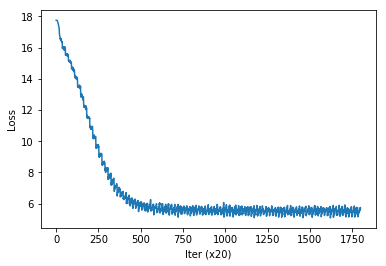

In [0]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs

## 단어 분산 표현 저장 및 확인

In [0]:
out_v = open('ko-vecs2.tsv', 'w', encoding='utf-8')
out_m = open('ko-meta2.tsv', 'w', encoding='utf-8')

for word_id, word in id_to_word.items():
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in word_vecs[word_id]]) + "\n")
out_v.close()
out_m.close()

[Tensor board](http://projector.tensorflow.org/)

## W2V의 개선

### 문제점
- W2V는 $W_{in}$과 $W_{out}$을 학습함
- 각각은 $V x N$, $N x V$의 크기
    - 단어수 : 10만개
    - 임베딩 차원 : 100차원
        - 2000만개(2 x 10만 x 100)의 값을 구해야 함
- 단어가 늘어날 수록 계산량이 폭발적으로 증가

### 해결 방안

#### 1. MatMul 연산 개선
- W2V에서 사용하는 MatMul 연산은 단순 행 혹은 열을 추출하는 연산
- Numpy를 이용한다면 해당 단어의 행을 추출하는 작업으로 대체 가능

#### 2. Negative Sampling(확률 계산의 효율성을 위해)
- 하나의 단어에 대한 Softmax 계산은 $y_k = \frac{\exp(S_k)}{\sum_{i=1}^{n} \exp(S_{i})}$
- Corpus가 커지면 연산량이 폭발적으로 증가
- 모든 단어가 아닌 일부 단어만 뽑아서 학습
- positive sample과 negative sample 일부를 사용하여 학습
- Negative sampling은 corpus에서 각 단어의 출현 횟수를 구한 확률분포를 토대로 사용
- Corpus에서 자주 등장하는 단어는 자주 선택되어 자주 업데이트 됨
- 일반적으로 5~20개 정도의 negative sample을 이용

#### 3. Subsamplig frequent words(저빈도 단어에게 학습의 기회를 많이 주기 위해)
- 고빈도 단어는 업데이트가 많이 될 수 있음
- 'the', 'a', 'in' 등과 같은 고빈도 단어들의 학습량을 확률적으로 줄이고 저빈도 단어의 학습 기회를 줄 필요 존재
- 단어$w$는 $P(w_i) = 1 - \sqrt{\frac{t}{f(w_i)}}$의 확률로 학습에서 제외되며, $t$는 $10^{-5}$ 정도가 적절

### 이런 것도 존재
- [Binary Classification](https://github.com/sucream/cogpsi/blob/master/RL/W2/nlp/week_02.ipynb)

## 결론
- 잘 만들어져 있는 라이브러리를 이용하자..

## 참고
- [밑바닥부터 시작하는 딥러닝2](https://github.com/WegraLee/deep-learning-from-scratch-2)
- [gichang.lee - Word2Vec의 학습 방식](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/30/word2vec/)
- [coursera - Natural Language Processing in TensorFlow](https://www.coursera.org/learn/natural-language-processing-tensorflow)